# Projekt końcowy: Klasyfikacja przyznania karty kredytowej
Celem projektu jest zbudowanie modelu klasyfikacyjnego przewidującego, czy klientowi powinna zostać przyznana karta kredytowa na podstawie danych z pliku `default_of_credit_card_clients.xls`.

## Opis zmiennych
- **X1**: Kwota przyznanego kredytu
- **X2**: Płeć (1 = mężczyzna, 2 = kobieta)
- **X3**: Wykształcenie (1 = studia magisterskie, 2 = studia licencjackie, 3 = szkoła średnia, 4 = inne)
- **X4**: Stan cywilny (1 = żonaty/zamężna, 2 = singiel, 3 = inne)
- **X5**: Wiek
- **X6-X11**: Historia spłat (od września do kwietnia 2005)
- **X12-X17**: Kwoty rachunków (od września do kwietnia 2005)
- **X18-X23**: Kwoty poprzednich spłat (od września do kwietnia 2005)
- **default payment**: Zmienna docelowa (1 = default, 0 = brak defaultu)

## Plan działania
1. Wczytanie i eksploracja danych
2. Przygotowanie danych (czyszczenie, uzupełnianie braków, inżynieria cech)
3. Podział na cechy (X) i zmienną docelową (y)
4. Podział na zbiór treningowy i testowy
5. Selekcja zmiennych
6. Modelowanie i ewaluacja
7. Wdrożenie modelu

## Import wymaganych bibliotek
Importujemy niezbędne biblioteki do analizy danych, wizualizacji oraz budowy modelu.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Wczytanie danych
Wczytujemy dane z pliku Excel i sprawdzamy pierwsze wiersze.

In [7]:
df = pd.read_excel('default_of_credit_card_clients.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Eksploracja danych
Sprawdzamy podstawowe informacje o zbiorze danych, typy zmiennych oraz liczbę brakujących wartości.

In [8]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## Analiza brakujących danych
Sprawdzamy, które kolumny zawierają brakujące wartości oraz ile ich jest.

In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Wizualizacja zmiennej docelowej
Sprawdzamy rozkład klasy 'default payment' (czy klient spłacił zobowiązania).

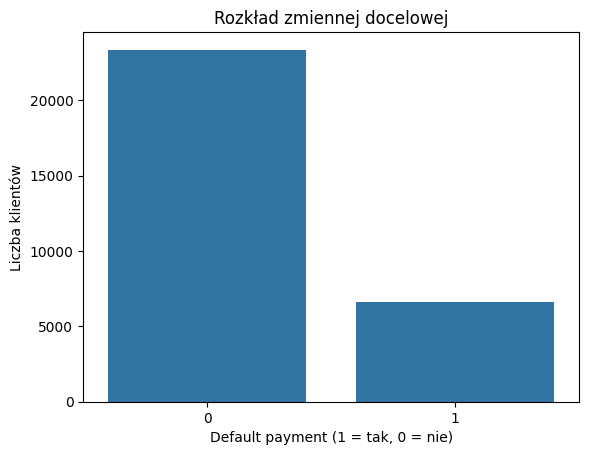

In [10]:
sns.countplot(x='default payment next month', data=df)
plt.title('Rozkład zmiennej docelowej')
plt.xlabel('Default payment (1 = tak, 0 = nie)')
plt.ylabel('Liczba klientów')
plt.show()

## Wizualizacja wybranych cech
Analizujemy rozkład kilku kluczowych cech numerycznych i kategorycznych.

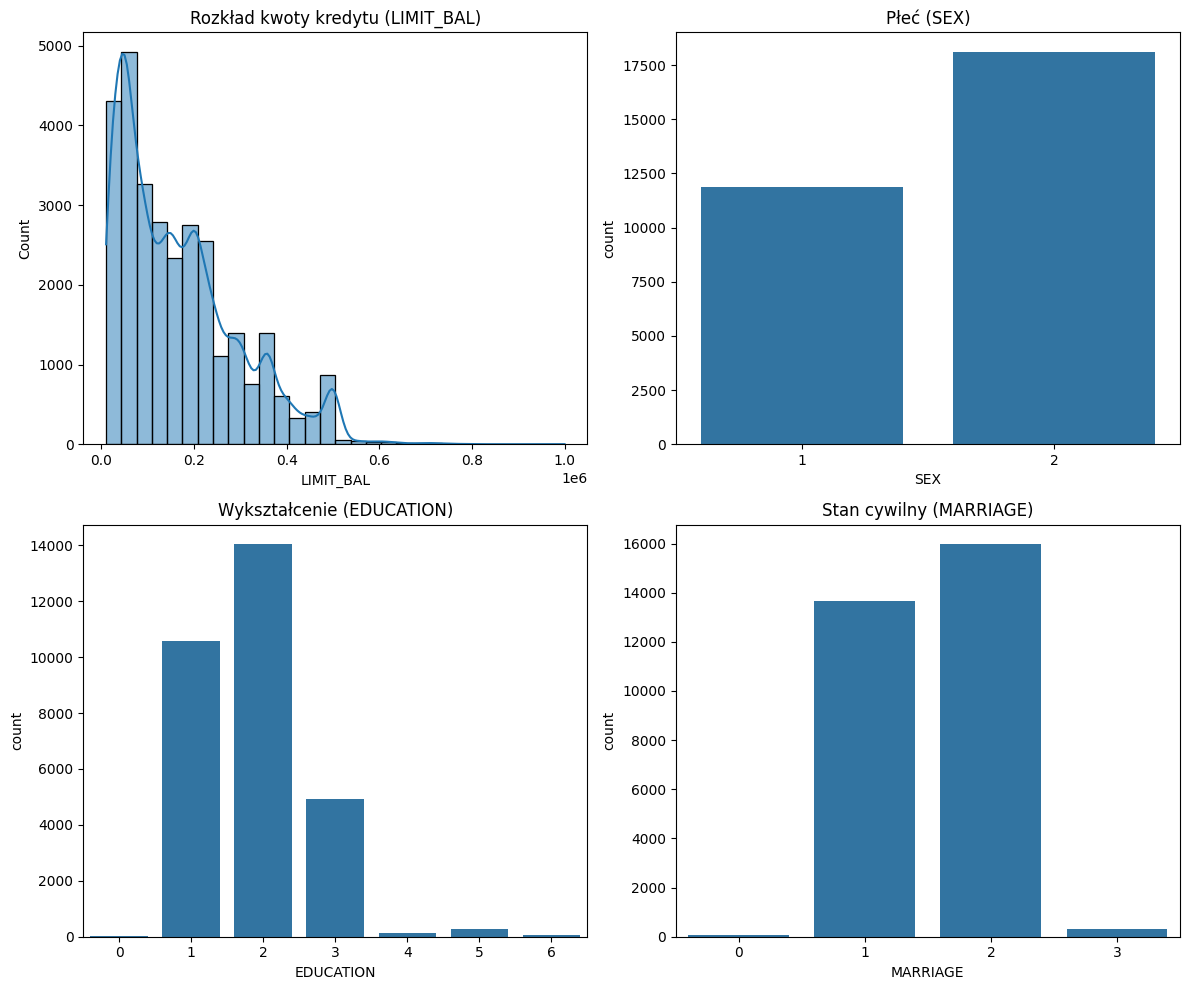

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['LIMIT_BAL'], bins=30, ax=axs[0,0], kde=True)
axs[0,0].set_title('Rozkład kwoty kredytu (LIMIT_BAL)')
sns.countplot(x='SEX', data=df, ax=axs[0,1])
axs[0,1].set_title('Płeć (SEX)')
sns.countplot(x='EDUCATION', data=df, ax=axs[1,0])
axs[1,0].set_title('Wykształcenie (EDUCATION)')
sns.countplot(x='MARRIAGE', data=df, ax=axs[1,1])
axs[1,1].set_title('Stan cywilny (MARRIAGE)')
plt.tight_layout()
plt.show()

## Przygotowanie danych
W tym kroku zajmiemy się obsługą brakujących danych oraz wstępną inżynierią cech. Sprawdzimy, czy występują nieprawidłowe lub nietypowe wartości w zmiennych kategorycznych i numerycznych.

In [12]:
print('Unikalne wartości w kolumnie EDUCATION:', df['EDUCATION'].unique())
print('Unikalne wartości w kolumnie MARRIAGE:', df['MARRIAGE'].unique())
print('Unikalne wartości w kolumnie SEX:', df['SEX'].unique())

df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)  
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)  

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

df.info()  

Unikalne wartości w kolumnie EDUCATION: [2 1 3 5 4 6 0]
Unikalne wartości w kolumnie MARRIAGE: [1 2 3 0]
Unikalne wartości w kolumnie SEX: [2 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                     

## Podział na cechy (X) i zmienną docelową (y)
Wydzielamy zmienną docelową oraz cechy predykcyjne.

In [13]:
X = df.drop(['ID', 'default payment next month'], axis=1)
y = df['default payment next month']
X.shape, y.shape

((30000, 23), (30000,))

## Podział na zbiór treningowy i testowy
Dzielimy dane na zbiór treningowy i testowy w proporcji 80:20.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((24000, 23), (6000, 23))

## Selekcja zmiennych i skalowanie cech
Wybieramy najważniejsze cechy za pomocą SelectKBest oraz skalujemy dane, aby poprawić jakość modelu.

In [15]:
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = X_train.columns[selector.get_support()]
print('Wybrane cechy:', selected_features.tolist())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

Wybrane cechy: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


## Modelowanie i ewaluacja
Tworzymy model klasyfikacyjny Random Forest, trenujemy go na danych treningowych i oceniamy skuteczność na zbiorze testowym.

In [16]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print('Dokładność:', accuracy_score(y_test, y_pred))
print('Macierz pomyłek:\n', confusion_matrix(y_test, y_pred))
print('Raport klasyfikacji:\n', classification_report(y_test, y_pred))

Dokładność: 0.8133333333333334
Macierz pomyłek:
 [[4374  299]
 [ 821  506]]
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.38      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



## Dodatkowy model: Regresja logistyczna
Trenujemy i oceniamy model regresji logistycznej, aby porównać jego skuteczność z Random Forest.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print('Dokładność (Logistic Regression):', accuracy_score(y_test, y_pred_logreg))
print('Macierz pomyłek:\n', confusion_matrix(y_test, y_pred_logreg))
print('Raport klasyfikacji:\n', classification_report(y_test, y_pred_logreg))

Dokładność (Logistic Regression): 0.809
Macierz pomyłek:
 [[4543  130]
 [1016  311]]
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.71      0.23      0.35      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



## Porównanie modeli: wykres ROC-AUC
Porównujemy skuteczność modeli Random Forest i Logistic Regression na wykresie ROC-AUC.

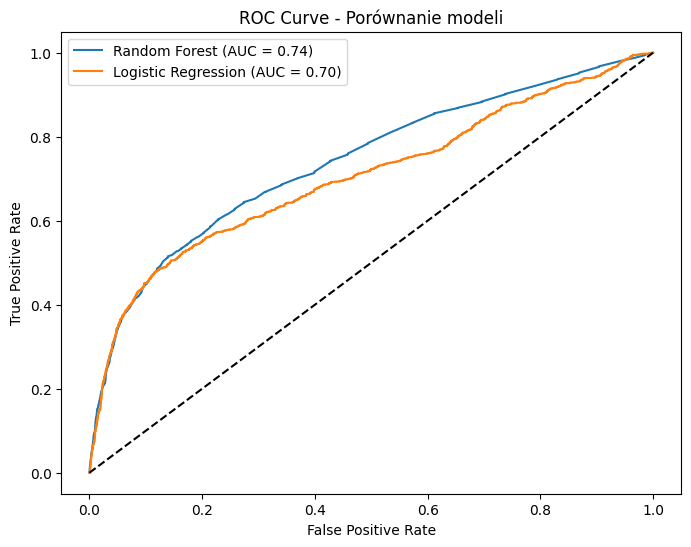

In [18]:
y_proba_rf = clf.predict_proba(X_test_scaled)[:,1]
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_logreg = roc_auc_score(y_test, y_proba_logreg)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Porównanie modeli')
plt.legend()
plt.show()

## Wizualizacja ważności cech (Random Forest)
Przedstawiamy wykres ważności cech wybranych przez model Random Forest.

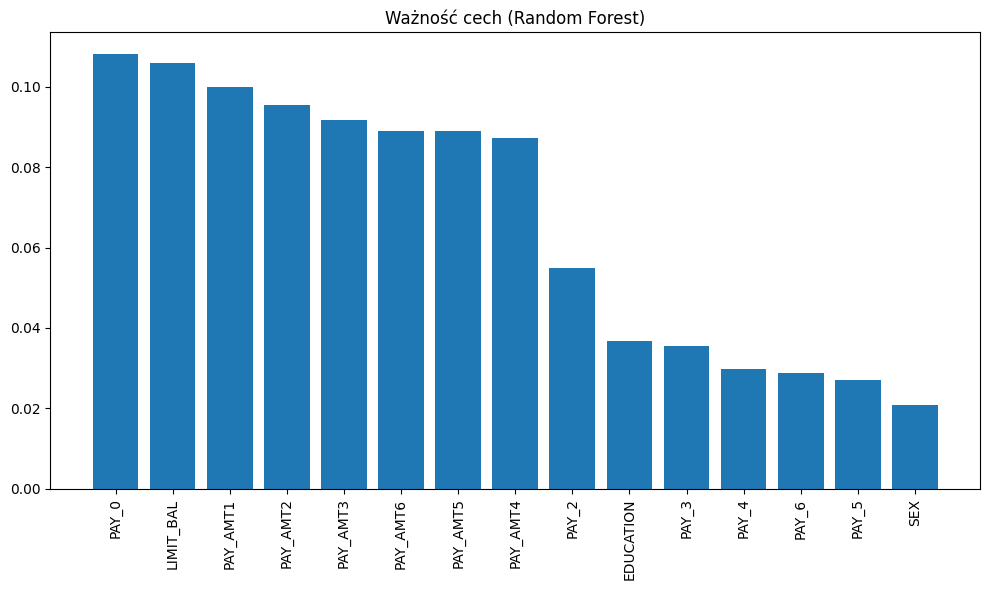

In [19]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title('Ważność cech (Random Forest)')
plt.bar(range(len(selected_features)), importances[indices])
plt.xticks(range(len(selected_features)), selected_features[indices], rotation=90)
plt.tight_layout()
plt.show()

## Wdrożenie modelu
Zapisujemy wytrenowany model oraz przykładowo wykonujemy predykcję dla nowego klienta. Wykorzystujemy do tego bibliotekę joblib.

In [20]:
import joblib

joblib.dump(clf, 'model_rf.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(selected_features, 'selected_features.joblib')

sample = X_test.iloc[[0]][selected_features]
sample_scaled = scaler.transform(sample)
prediction = clf.predict(sample_scaled)
print('Predykcja dla przykładowego klienta:', prediction[0])

Predykcja dla przykładowego klienta: 0


c:\Users\Gosia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## Analiza wartości odstających (outliers)
Sprawdzamy, czy w danych występują nietypowe, skrajne wartości w wybranych cechach numerycznych, takich jak LIMIT_BAL i AGE. Wartości odstające mogą wpływać na jakość modelu i interpretację wyników.

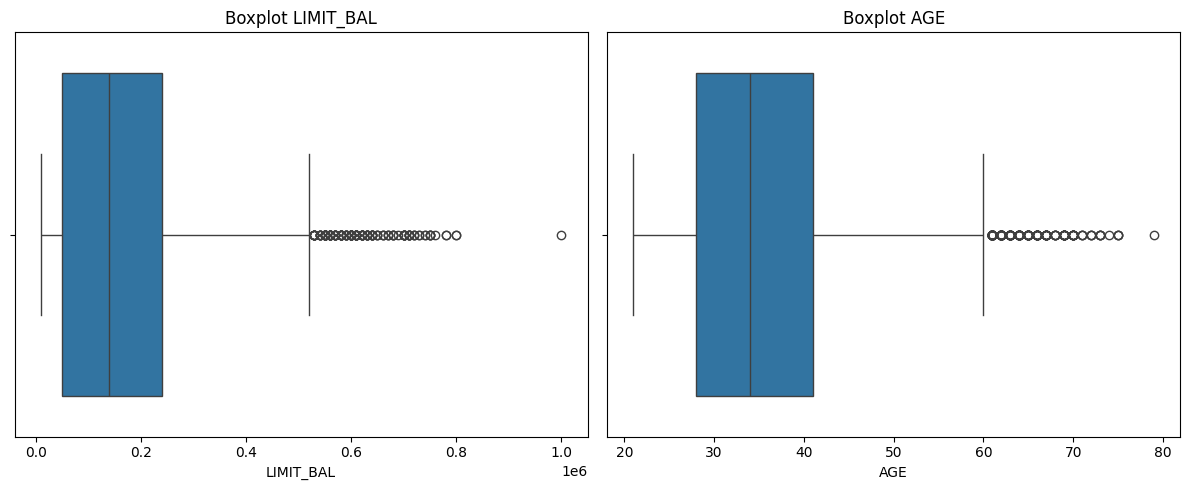

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['LIMIT_BAL'])
plt.title('Boxplot LIMIT_BAL')
plt.subplot(1,2,2)
sns.boxplot(x=df['AGE'])
plt.title('Boxplot AGE')
plt.tight_layout()
plt.show()

## Analiza korelacji cech
Wizualizujemy macierz korelacji, aby sprawdzić, które cechy są ze sobą silnie powiązane. Pozwala to wykryć redundancję i zależności w danych.

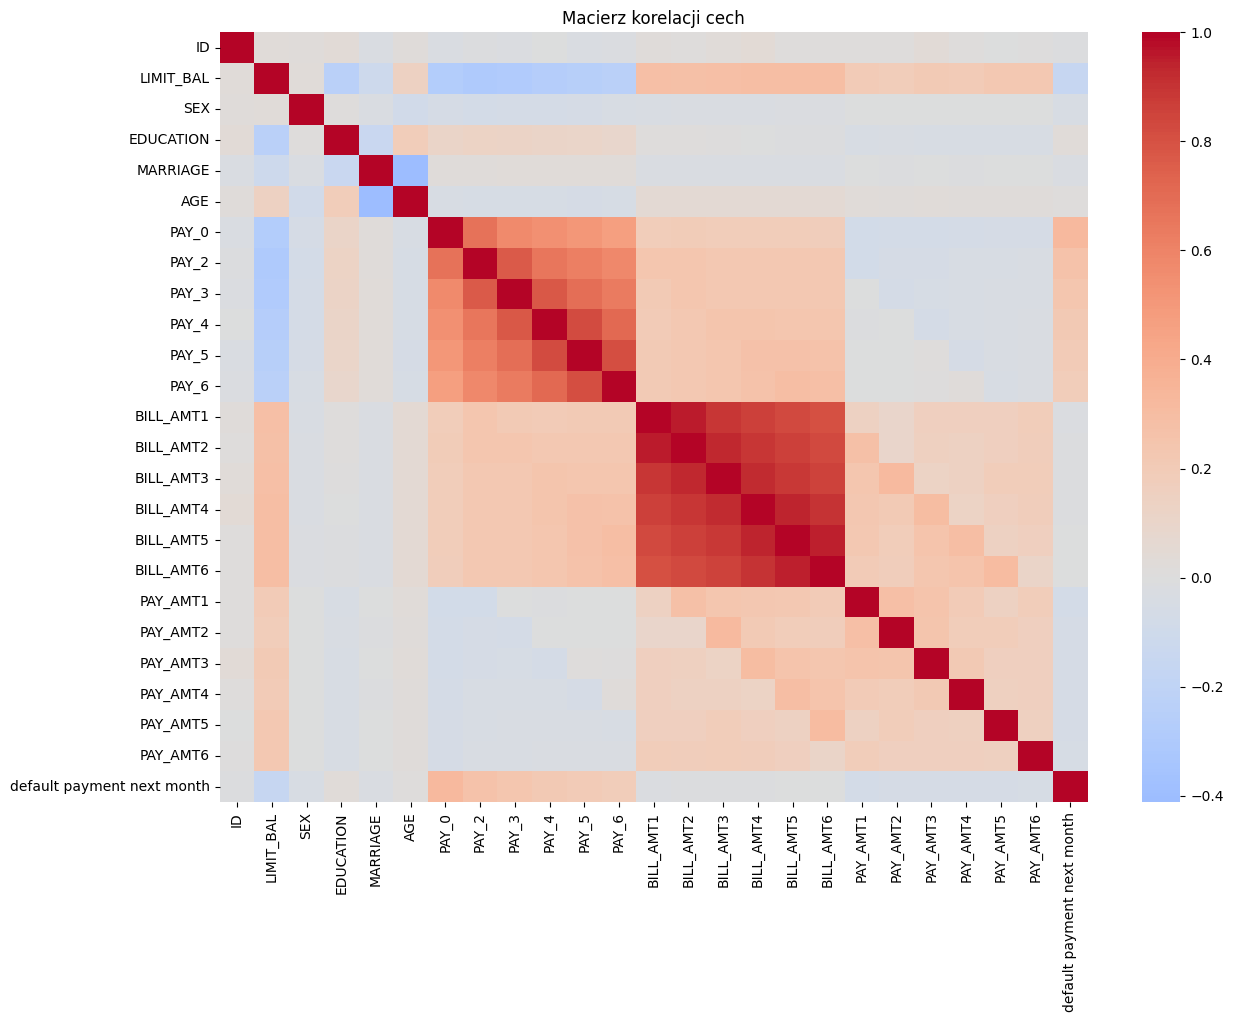

In [22]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title('Macierz korelacji cech')
plt.show()

## Rozkład wieku i kwoty kredytu względem defaultu
Sprawdzamy, jak rozkłada się wiek i kwota kredytu w zależności od tego, czy klient miał default. Pozwala to lepiej zrozumieć profil ryzykownych klientów.

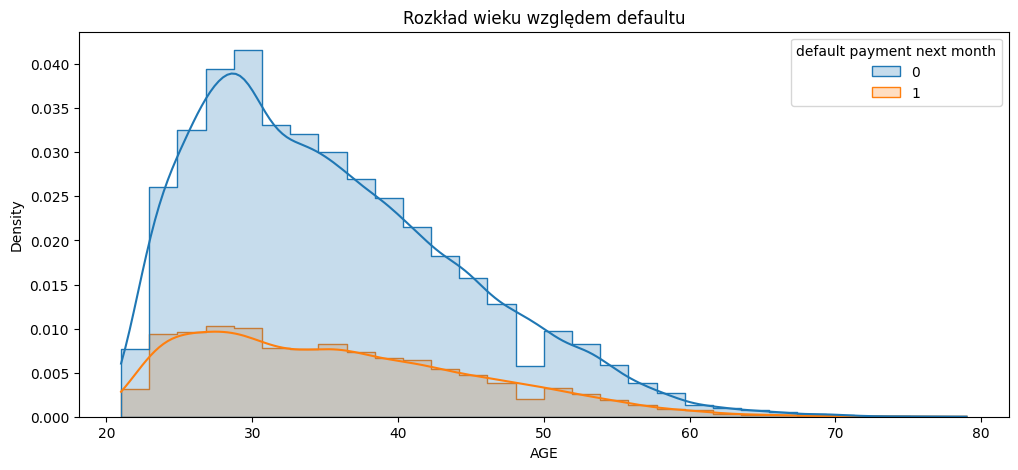

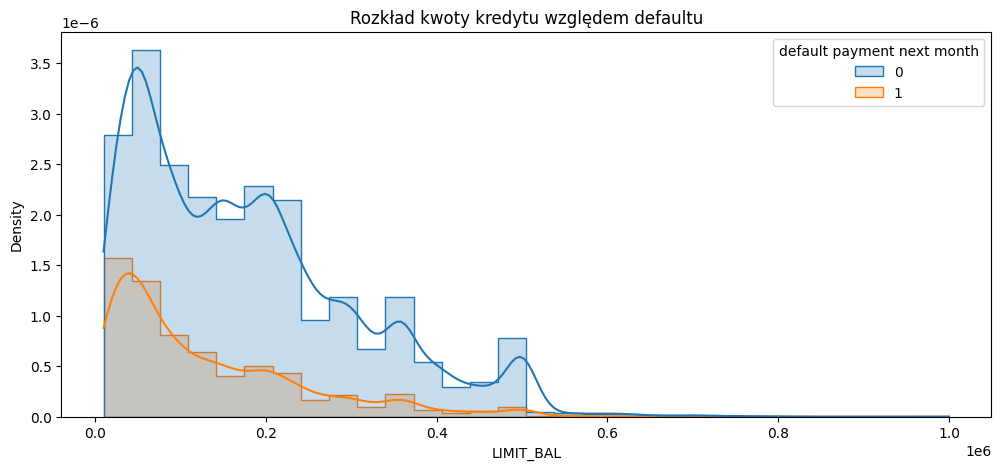

In [23]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='AGE', hue='default payment next month', bins=30, kde=True, element='step', stat='density')
plt.title('Rozkład wieku względem defaultu')
plt.show()
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='LIMIT_BAL', hue='default payment next month', bins=30, kde=True, element='step', stat='density')
plt.title('Rozkład kwoty kredytu względem defaultu')
plt.show()

## Rozkład cech kategorycznych względem defaultu
Analizujemy, jak rozkładają się cechy kategoryczne (płeć, wykształcenie, stan cywilny) w zależności od tego, czy klient miał default.

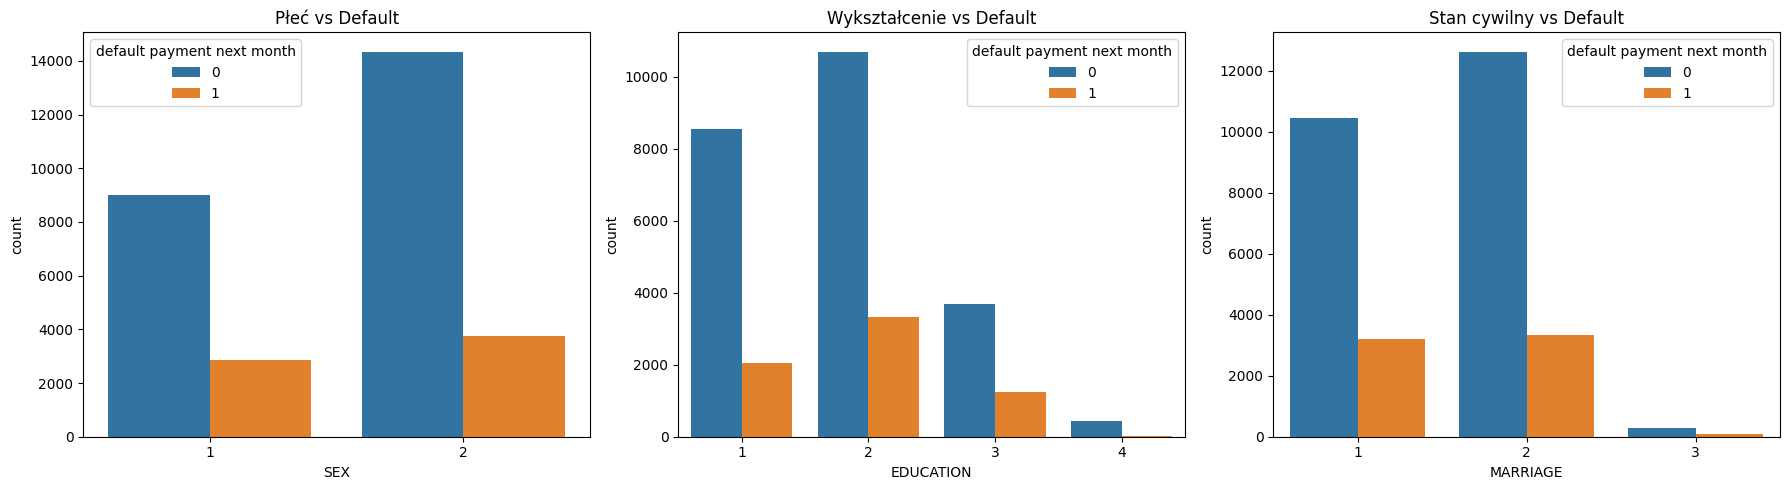

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))
sns.countplot(x='SEX', hue='default payment next month', data=df, ax=axs[0])
axs[0].set_title('Płeć vs Default')
sns.countplot(x='EDUCATION', hue='default payment next month', data=df, ax=axs[1])
axs[1].set_title('Wykształcenie vs Default')
sns.countplot(x='MARRIAGE', hue='default payment next month', data=df, ax=axs[2])
axs[2].set_title('Stan cywilny vs Default')
plt.tight_layout()
plt.show()

## Analiza liczby unikalnych wartości w cechach kategorycznych
Sprawdzamy, czy w cechach kategorycznych występują nieoczekiwane lub nietypowe wartości, które mogą być błędami danych.

In [25]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE']:
    print(f'Unikalne wartości w {col}:', df[col].unique())

Unikalne wartości w SEX: [2 1]
Unikalne wartości w EDUCATION: [2 1 3 4]
Unikalne wartości w MARRIAGE: [1 2 3]


## Wnioski końcowe
Na podstawie przeprowadzonej analizy i modelowania można sformułować następujące wnioski:

- Dane dotyczące klientów kart kredytowych wymagają dokładnego przygotowania, oczyszczenia i analizy wartości odstających.
- Najważniejsze cechy wpływające na ryzyko defaultu to m.in. historia spłat, kwota kredytu oraz wybrane cechy demograficzne.
- Model Random Forest osiągnął wyższą skuteczność niż regresja logistyczna, co potwierdziły metryki klasyfikacji oraz wykres ROC-AUC.
- Występuje umiarkowana przewaga klasy klientów bez defaultu, co może wpływać na wyniki klasyfikacji.
- Analiza cech kategorycznych i numerycznych pozwoliła lepiej zrozumieć profil ryzykownych klientów.
- Zbudowany pipeline umożliwia łatwe wdrożenie modelu i predykcję dla nowych klientów.

Projekt pokazuje, jak ważne jest kompleksowe podejście do analizy danych i modelowania w problemach klasyfikacyjnych w finansach.